# 다중회귀_실습

## 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
%matplotlib inline

## Step1. 분석에 필요한 데이터 구성하기

### 데이터 불러오기

In [2]:
ds = pd.read_csv("DIABETEST.csv")
ds.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


### 결측치 확인

In [3]:
ds.isnull().sum()

Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64

### 데이터 역할 지정

In [4]:
ds_y = ds['Y']
ds_x = ds.drop("Y",axis = 1, inplace = False)
print("목표변수 데이터 크기:{}".format(ds_y.shape))
print("설명변수 데이터 크기:{}".format(ds_x.shape))

목표변수 데이터 크기:(442,)
설명변수 데이터 크기:(442, 10)


### 절편 추가

In [5]:
ds_x_const = sm.add_constant(ds_x)
ds_x_const.head()

/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,1.0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,1.0,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,1.0,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,1.0,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,1.0,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


## Step2. 변수 간의 경향성 파악 : 그래프 분석

### 산점도 행렬

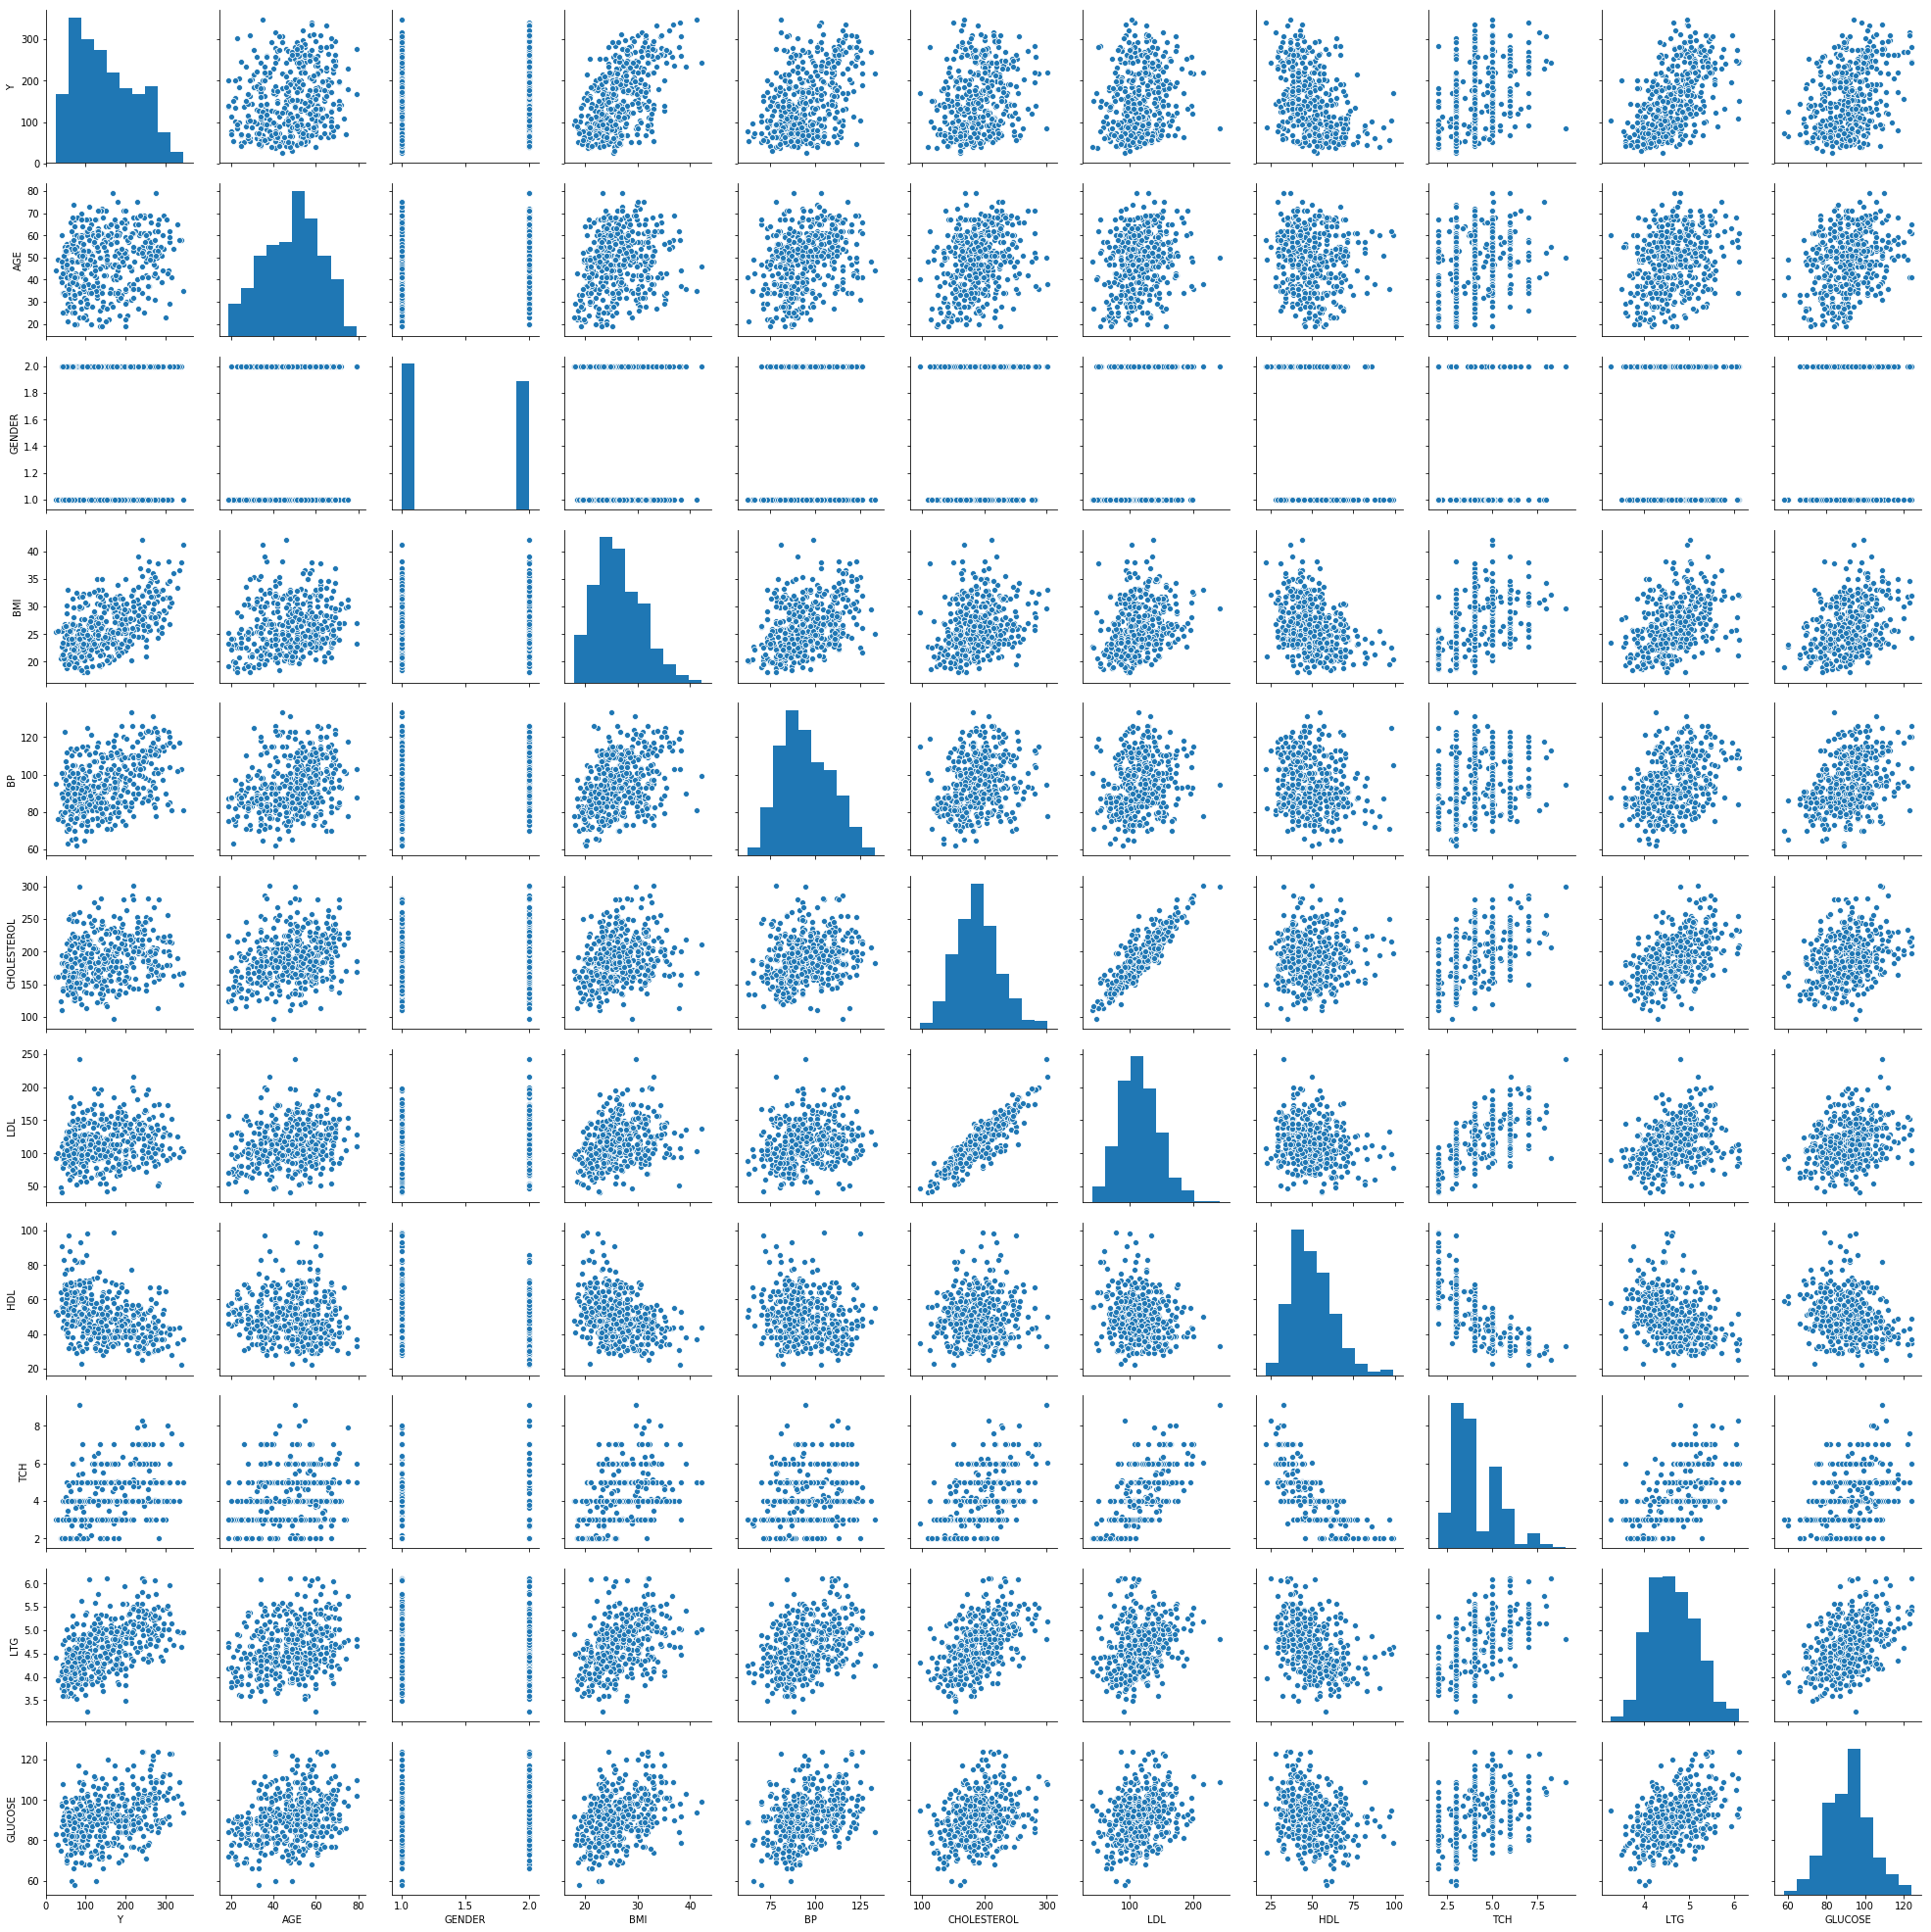

In [6]:
sns.pairplot(ds)

### 상관관계 분석

In [7]:
ds.corr().round(3)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.188,0.043,0.586,0.441,0.212,0.174,-0.395,0.430,0.566,0.382
AGE,0.188,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302
GENDER,0.043,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208
BMI,0.586,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389
BP,0.441,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390
CHOLESTEROL,0.212,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326
LDL,0.174,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291
HDL,-0.395,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274
TCH,0.430,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417
LTG,0.566,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465


### LDL과 CHOLETEROL사이의 높은 선형적 상관관계가 존재하는 것으로 보인다. HDL과 TCH사이엔 높은 음의 상관관계가 존재한다.

## Step3. 회귀 모델 생성

In [8]:
reg_multi_model = sm.OLS(ds_y, ds_x_const)
reg_multi_results = reg_multi_model.fit()
print(reg_multi_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           3.83e-62
Time:                        16:13:58   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -334.5671     67.455     -4.960      

### 모델을 통해 설명변수를 51.8%설명할 수 있다. AGE, LDL, HDL, TCH, CLUCOSE의 p값이 0.05를 훨씬 넘어 유의하지 않는다.

### 다중 공선성 검토

In [10]:
ds_vif = pd.DataFrame()
ds_vif['variable'] = ds_x_const.columns
ds_vif["VIF"] = [variance_inflation_factor(ds_x_const.values, i) for i in range(ds_x_const.shape[1])]
ds_vif.sort_values("VIF", inplace = True)
ds_vif.round(3)

,variable,VIF
1,AGE,1.217
2,GENDER,1.278
4,BP,1.459
10,GLUCOSE,1.485
3,BMI,1.509
8,TCH,8.891
9,LTG,10.076
7,HDL,15.402
6,LDL,39.193
5,CHOLESTEROL,59.203


### CHOLESTEROL의 VIF가 정말 높다... 제외하자!

### 후진제거법을 이용한 변수선택

In [21]:
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=6).fit(ds_x, ds_y)
selected_cols = ds_x.columns[rfe.support_]
removed_cols = ds_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['GENDER', 'BMI', 'BP', 'CHOLESTEROL', 'TCH', 'LTG'], dtype='object')
Removed Variables : Index(['AGE', 'LDL', 'HDL', 'GLUCOSE'], dtype='object')


### 회귀모델 선택

In [22]:
ds_x_rfe = sm.add_constant(ds_x_const[selected_cols])
reg_multi_rfe_model = sm.OLS(ds_y, ds_x_rfe)
reg_multi_rfe_results = reg_multi_rfe_model.fit()
print(reg_multi_rfe_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     76.51
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           5.71e-65
Time:                        16:26:23   Log-Likelihood:                -2388.0
No. Observations:                 442   AIC:                             4790.
Df Residuals:                     435   BIC:                             4819.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -279.9995     27.941    -10.021      

/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 변수를 제거했을때, 설명력은 거의 변동이 없었지만, 변수의 p값이 0.05보다 작아 모두 유의했다.

### 다중 공선성 진단

In [23]:
ds_rfe_vif = pd.DataFrame()
ds_rfe_vif['variable'] = ds_x_rfe.columns
ds_rfe_vif["VIF"] = [variance_inflation_factor(ds_x_rfe.values, i) for i in range(ds_x_rfe.shape[1])]
ds_rfe_vif.sort_values("VIF", inplace = True)
ds_rfe_vif.round(3)

,variable,VIF
1,GENDER,1.236
3,BP,1.356
2,BMI,1.422
4,CHOLESTEROL,1.596
6,LTG,1.986
5,TCH,2.190
0,const,117.704


### 후진제거법을 이용해 선택된 변수들은 다중공선성의 문제가 없는것으로 보인다.

## Step4. 결론 도출

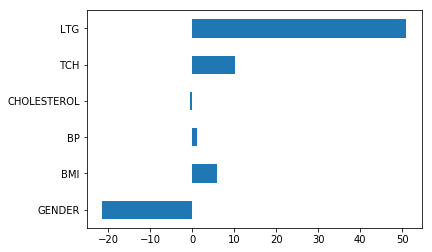

In [25]:
ds_reg_coef = pd.DataFrame({"Coef":reg_multi_rfe_results.params.values[1:]}, index=reg_multi_rfe_model.exog_names[1:])
ds_reg_coef.plot.barh(y="Coef", legend= False)

### LTG가 높을수록 Y가 높아진다고 볼 수 있다.

### 회귀계수 표준화로 변수 중요도 확인

/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


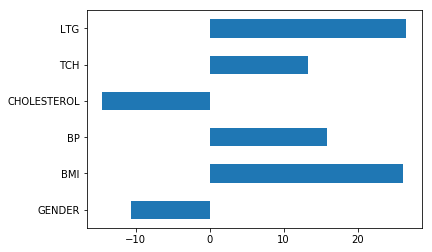

In [26]:
ds_x_scaled = scale(ds_x_const[selected_cols])
ds_x_scaled = sm.add_constant(ds_x_scaled)
reg_multi_scaled_model = sm.OLS(ds_y, ds_x_scaled)
reg_multi_scaled_results = reg_multi_scaled_model.fit()
ds_reg_scaled_coef = pd.DataFrame({"Coef" : reg_multi_scaled_results.params.values[1:]}, index = reg_multi_rfe_model.exog_names[1:])
ds_reg_scaled_coef.plot.barh(y = "Coef", legend = False)

### 표준화한 뒤 보면, LTG와 BMI가 끼치는 영향이 비슷하다고 볼 수 있었다.